# Setting up

In [ ]:
import warnings
warnings.filterwarnings('ignore')

!wget https://www.dropbox.com/s/2cwl1l9v370wkep/cv_dataset.zip

--2023-06-25 16:28:21--  https://www.dropbox.com/s/2cwl1l9v370wkep/cv_dataset.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/2cwl1l9v370wkep/cv_dataset.zip [following]
--2023-06-25 16:28:22--  https://www.dropbox.com/s/raw/2cwl1l9v370wkep/cv_dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc813128dd26162460510192c9f4.dl.dropboxusercontent.com/cd/0/inline/B-qbQhFb8L-3zZvDiu9Y9Eh7D5TVa_iUMrCWbvDnW6jAp2QFW-KMnZrJAMnOHKJreuTiBfXx8a2YTggxvUsJGPSgKy5xyqDxUuIVffWDij53G86OmX5gWKi0CCvMXrwWsA3G3Nh9_FSEtAmgrdHRigcIw4YL0QRTzmjvc6rh6ngBcA/file# [following]
--2023-06-25 16:28:22--  https://uc813128dd26162460510192c9f4.dl.dropboxusercontent.com/cd/0/inline/B-qbQhFb8L-3zZvDiu9Y9Eh7D5TVa_iUMrCWbvDnW6jAp2QFW-KMnZrJAMnOHKJreuTiBfXx8a

In [ ]:
!unzip cv_dataset.zip

Archive:  cv_dataset.zip
   creating: cv_dataset/
   creating: cv_dataset/sugarcane/
  inflating: cv_dataset/.DS_Store    
  inflating: __MACOSX/cv_dataset/._.DS_Store  
   creating: cv_dataset/grass/
   creating: cv_dataset/cassava/
   creating: cv_dataset/maize/
  inflating: cv_dataset/sugarcane/image_s_40.jpg  
  inflating: cv_dataset/sugarcane/image_s_54.jpg  
  inflating: cv_dataset/sugarcane/image_s_68.jpg  
  inflating: cv_dataset/sugarcane/image_s_83.jpg  
  inflating: cv_dataset/sugarcane/image_s_97.jpg  
  inflating: cv_dataset/sugarcane/image_s_96.jpg  
  inflating: cv_dataset/sugarcane/image_s_82.jpg  
  inflating: cv_dataset/sugarcane/image_s_69.jpg  
  inflating: cv_dataset/sugarcane/image_s_55.jpg  
  inflating: cv_dataset/sugarcane/image_s_41.jpg  
  inflating: cv_dataset/sugarcane/image_s_57.jpg  
  inflating: cv_dataset/sugarcane/image_s_43.jpg  
  inflating: cv_dataset/sugarcane/image_s_94.jpg  
  inflating: cv_dataset/sugarcane/image_s_80.jpg  
  inflating: cv_datas

## process dataset

In [ ]:
import os
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import cv2

In [ ]:
os.makedirs("./train")
os.makedirs("./test")

cassava = len(os.listdir('./cv_dataset/cassava'))
maize = len(os.listdir('./cv_dataset/maize'))
sugarcane = len(os.listdir('./cv_dataset/sugarcane'))
grass = len(os.listdir('./cv_dataset/grass'))

print(f"{cassava} Cassava Images")
print(f"{maize} Maize Images")
print(f"{sugarcane} Sugar Cane Images")
print(f"{grass} Grass Images")

298 Cassava Images
280 Maize Images
102 Sugar Cane Images
287 Grass Images


In [ ]:
def populate_for_class():
  data_test = []
  data_train = []
  classes = [
      {
          "dir": 'cv_dataset/cassava',
          "label": 0
      },
      {
          "dir": 'cv_dataset/grass',
          "label": 1
      },
      {
          "dir": 'cv_dataset/maize',
          "label": 2
      },
      {
          "dir": 'cv_dataset/sugarcane',
          "label": 3
      }
  ]
  for dataset_class in classes:
    label = dataset_class['label']
    src = dataset_class['dir']
    images = os.listdir(src)
    split = int(len(images) * 0.75)
    for i, img in enumerate(images):
      if i < split:
        shutil.copy(os.path.join(src, img), os.path.join(f"train/", img))
        data_train.append([os.path.join(f"train/", img), label])
      else:
        shutil.copy(os.path.join(src, img), os.path.join(f"test/", img))
        data_test.append([os.path.join(f"test/", img), label])

  return data_train, data_test

data_train, data_test = populate_for_class()

In [ ]:
# Save train labels to csv file.
data_train = pd.DataFrame(data_train, columns=['image_path', 'label'])
data_train.to_csv('labels_train.csv')
data_train.head()

image_path  label
0  train/image_c_184.jpg      0
1  train/image_c_204.jpg      0
2  train/image_c_258.jpg      0
3  train/image_c_262.jpg      0
4  train/image_c_142.jpg      0

In [ ]:
# Save train labels to csv file.
data_test = pd.DataFrame(data_test, columns=['image_path', 'label'])
data_test.to_csv('labels_test.csv')
data_test.tail()

image_path  label
238  test/image_s_18.jpg      3
239  test/image_s_37.jpg      3
240  test/image_s_14.jpg      3
241  test/image_s_25.jpg      3
242  test/image_s_88.jpg      3

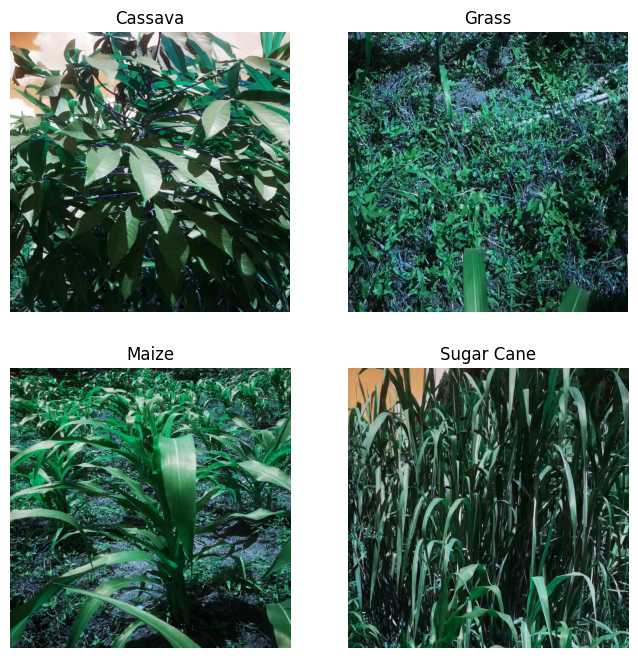

In [ ]:
i = 1
cols, rows = 2, 2
figure = plt.figure(figsize=(8, 8))
sample_labels = ["Cassava", "Grass", "Maize", "Sugar Cane"]
sample_images = ['cassava/image_c_1.jpg', 'grass/image_g_1.jpg', 'maize/image_m_1.jpg', 'sugarcane/image_s_1.jpg']
for path in sample_images:
    img = cv2.imread('cv_dataset/' + path)
    img = cv2.resize(img, (650, 650))
    figure.add_subplot(rows, cols, i)
    plt.title(sample_labels[i - 1])
    plt.axis("off")
    plt.imshow(img, cmap="gray")
    i += 1
plt.show()

<Figure size 800x800 with 0 Axes>

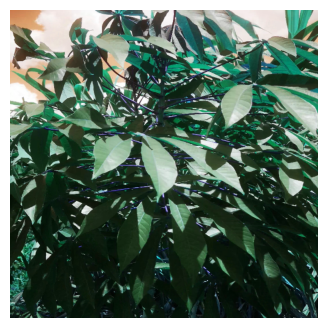

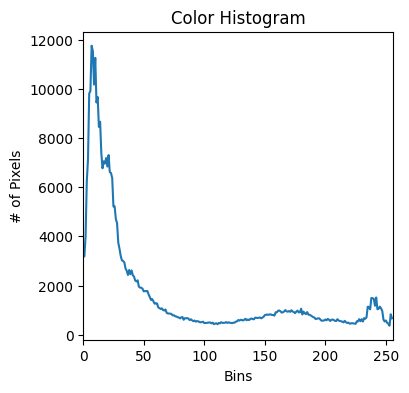

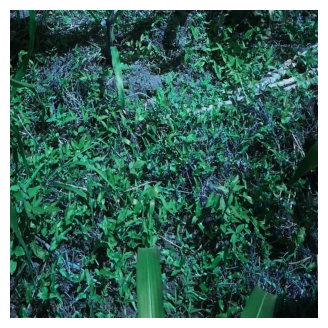

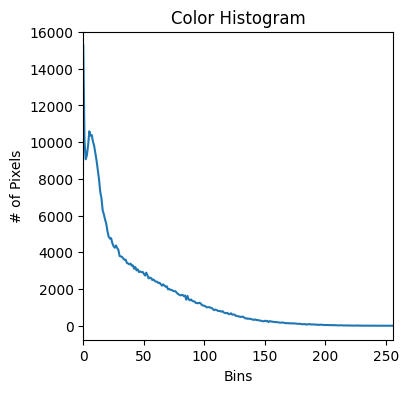

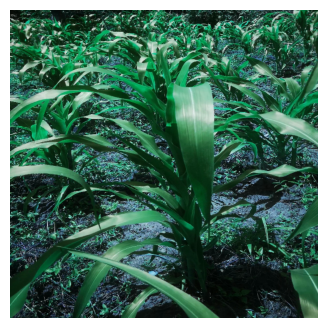

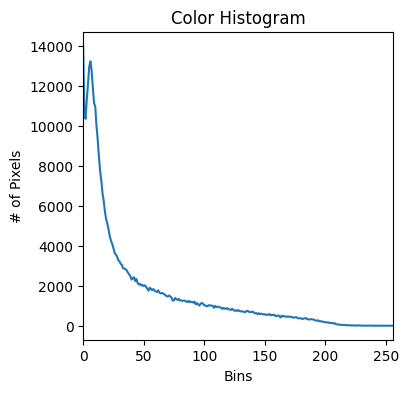

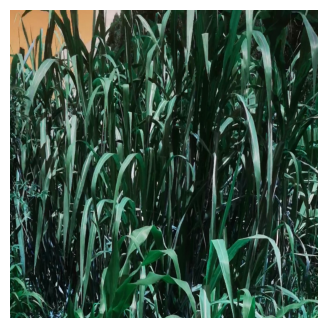

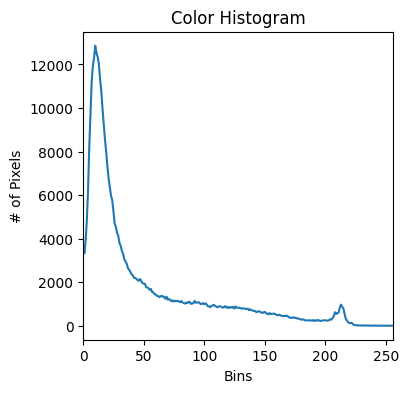

In [ ]:
count = 1
cols, rows = 4, 4
figure = plt.figure(figsize=(8, 8))
for path in sample_images:
    img = cv2.imread('cv_dataset/' + path)
    img = cv2.resize(img, (650, 650))
    hist = cv2.calcHist([img], [0], None, [256], [0, 256])

    plt.figure(figsize=(4, 4))
    plt.axis("off")
    plt.imshow(img)
    # plot the histogram
    plt.figure(figsize=(4, 4))
    plt.title("Color Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

## SIFT Sample(Cassava)

In [ ]:
# Key features for CV.
img = cv2.imread('cv_dataset/' + sample_images[0])
sift = cv2.SIFT_create()
kp = sift.detect(img,None)
img=cv2.drawKeypoints(img,kp,img)
cv2.imwrite('sift_keypoints.jpg',img)

True

# Train Model

In [ ]:
labels = data_train['label']
image_paths = data_train['image_path']

feature_vectors = []
# Extract Image features
for path in image_paths:
    image = cv2.imread(path)
    image = cv2.resize(image, (650, 650))
    image = cv2.calcHist([image], [0], None, [256], [0, 256])

    feature_vectors.append(image.flatten())

feature_vectors = np.array(feature_vectors)
labels = np.array(labels)

# Train model
naive_bayes = GaussianNB()
naive_bayes.fit(feature_vectors, labels)

GaussianNB()

In [ ]:
labels_test = data_test['label']
image_paths_test = data_test['image_path']

feature_vectors = []
for path, label in zip(image_paths_test, labels_test):
    image = cv2.imread(path)
    image = cv2.resize(image, (650, 650))
    image = cv2.calcHist([image], [0], None, [256], [0, 256])
    feature_vectors.append(image.flatten())

output_labels = naive_bayes.predict(np.array(feature_vectors))

In [ ]:
# Evaluate model
accuracy = accuracy_score(np.array(labels_test), np.array(output_labels))
print("Accuracy:", accuracy)

Accuracy: 0.8065843621399177


In [ ]:
print(classification_report(np.array(labels_test), np.array(output_labels)))

              precision    recall  f1-score   support

           0       0.95      0.69      0.80        75
           1       0.78      0.97      0.86        72
           2       0.77      0.71      0.74        70
           3       0.73      0.92      0.81        26

    accuracy                           0.81       243
   macro avg       0.80      0.83      0.80       243
weighted avg       0.82      0.81      0.80       243



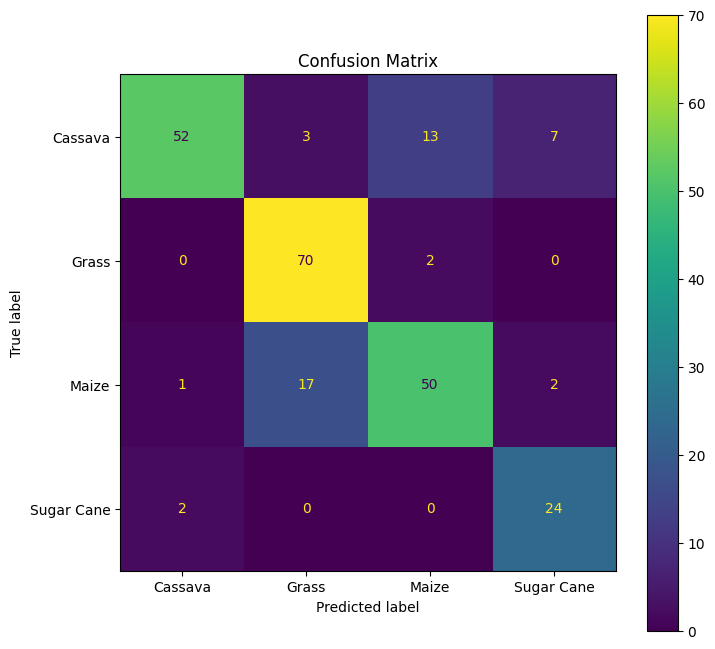

In [ ]:
matrix = confusion_matrix(np.array(labels_test), np.array(output_labels))
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()

# Model Training with SIFT

In [ ]:
feature_vectors_sift = []
extracted_labels_sift = []
# Extract Image features
for path , label in zip(image_paths, labels):
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (650, 650))
    key_points, descriptors = sift.detectAndCompute(image, None)

    if descriptors is not None:
      for descriptor in descriptors:
        feature_vectors_sift.append(descriptor.flatten())
        extracted_labels_sift.append(label)

feature_vectors_sift = np.array(feature_vectors_sift)
extracted_labels_sift = np.array(extracted_labels_sift)

# Train model
naive_bayes_sift = GaussianNB()
naive_bayes_sift.fit(feature_vectors_sift, extracted_labels_sift)

GaussianNB()

In [ ]:
predicted_labels_sift = []
for path in image_paths_test:
    image = cv2.imread(path, cv2.IMREAD_UNCHANGED)
    image = cv2.resize(image, (650, 650))
    key_points, descriptors = sift.detectAndCompute(image, None)

    if descriptors is not None:
      predicted = naive_bayes_sift.predict(descriptors)
      predicted_label = np.bincount(predicted.flatten()).argmax()
      predicted_labels_sift.append(predicted_label)

# Evaluate model
accuracy_sift = accuracy_score(np.array(labels_test), np.array(predicted_labels_sift))
print("Accuracy:", accuracy_sift)

Accuracy: 0.5267489711934157


In [ ]:
print(classification_report(np.array(labels_test), np.array(predicted_labels_sift)))

              precision    recall  f1-score   support

           0       0.90      0.51      0.65        75
           1       0.40      1.00      0.57        72
           2       0.00      0.00      0.00        70
           3       0.86      0.69      0.77        26

    accuracy                           0.53       243
   macro avg       0.54      0.55      0.50       243
weighted avg       0.49      0.53      0.45       243



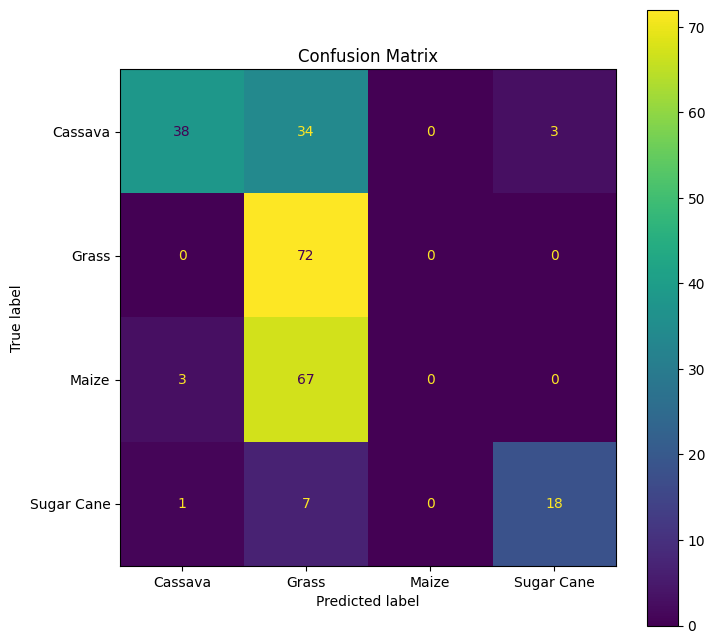

In [ ]:
matrix = confusion_matrix(np.array(labels_test), np.array(predicted_labels_sift))
cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels=['Cassava', 'Grass', 'Maize', 'Sugar Cane'])

plt.figure(figsize=(8,8))
plt.title(f"Confusion Matrix")
cm_display.plot(ax=plt.subplot())
plt.show()